# Logistic Regresion
### Luis Chunga

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import time
import nltk

###  Reading data 

In [2]:
start_time = time.time()
Corpus = pd.read_csv("input/Nausheen.csv",encoding = "latin")
# Display First five
Corpus

,tweets,category
0,Some of the most beautiful women your eyes wil...,2
1,Of course #notall Muslims are taught all of th...,2
2,Why is JoeBiden's Director of Jewish Outreach ...,1
3,On a Muslim dating app and I asked a guy what ...,2
4,"Haha thatâs why muslim smell like shit, stop...",2
...,...,...
908,'@fjspti We are talking about Pakistan not US ...,0
909,'From US to UK Kandahar to Kabul Delhi to Mu...,0
910,'Replug: For @Reuters on how families of thos...,0
911,News in brief: #smes #UKTI #CBI #Pakistan #glo...,0


In [3]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

tweets                                                               
          count unique                                                top freq
category                                                                      
0           417    414  Cruz introduces Senate bill to block COVID-19 ...    2
1           104    102  Ramy' becomes first Muslim American sitcom to ...    3
2           139    138  Muslims are the ones who invented the slave tr...    2
3           253    252  There can never be peace wherever there is Islam.    2

Text(0.5, 1.0, 'Number of Tweets')

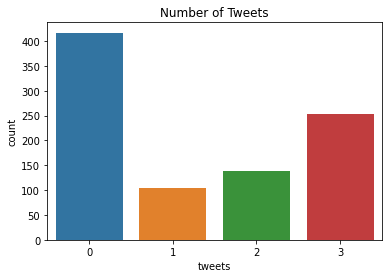

In [4]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('tweets')
plt.title('Number of Tweets')

In [5]:
len(Corpus['tweets'])

913

In [6]:
Corpus['tweets'][1]

'Of course #notall Muslims are taught all of this, but it is all sanctioned by the religion, unfortunately. So those of us who went to Islamic schools in the West, or grew up in one of the 50 Muslim majority countries, are taught this. Solidarity w Muslims who fight these edicts.'

In [17]:
vectorizer = TfidfVectorizer("english")

In [18]:
# vectorize the corpus email 
message_mat = vectorizer.fit_transform(Corpus['tweets'].values.astype('U'))

In [19]:
message_mat[0]

<1x6001 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

### Splitting 70% for training and 30% for testing

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(message_mat, 
                                                    Corpus['category'], 
                                                    test_size=0.3, 
                                                    random_state=20)

In [34]:
#
lr = LogisticRegression(solver='lbfgs', max_iter=200, random_state=20, multi_class='ovr').fit(X_train, Y_train)
yhat = lr.predict(X_test)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")


 -> Accuracy 0.5583941605839416

 -> Classification Report
              precision    recall  f1-score   support

           0       0.52      0.95      0.67       119
           1       1.00      0.08      0.15        36
           2       1.00      0.02      0.05        41
           3       0.68      0.46      0.55        78

    accuracy                           0.56       274
   macro avg       0.80      0.38      0.36       274
weighted avg       0.70      0.56      0.48       274


-> Classification Report
[[113   0   0   6]
 [ 33   3   0   0]
 [ 29   0   1  11]
 [ 42   0   0  36]]


In [35]:
print("{:.2f} seconds".format(time.time() - start_time))

1328.86 seconds


In [36]:

X_train[1][0]


<1x6001 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


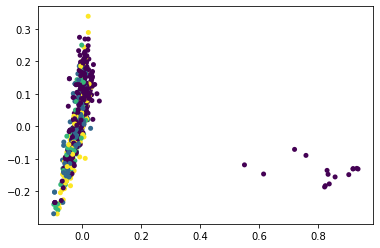

In [38]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(Corpus.tweets.values.astype('U')).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=Corpus.category, s=4, linewidths=3 )


plt.show()              #not required if using ipython notebook



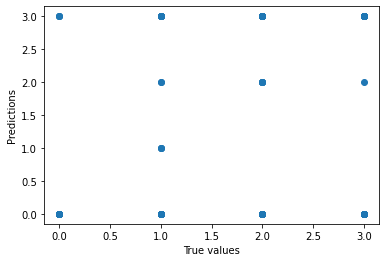

In [39]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train, Y_train, cv=6)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.scatter(Y_train, predictions)

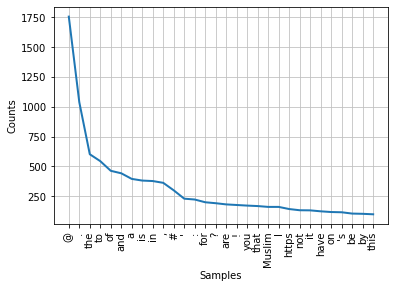

In [40]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import nltk

tokenized_word=[]
fdist = FreqDist()
for i in Corpus.tweets.values.astype('U'):
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, lr.predict(X_test), multi_class='ovo')
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1], multi_class='ovo')
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1